In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2
#%matplotlib qt

In [1]:
from skdim import commonfuncs
from skdim import global_id
from skdim import local_id
from _commonfuncs import get_nn

import multiprocessing as mp
import scipy
import numpy as np
import pandas as pd
import rpy2
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
import rpy2.robjects.packages as rpackages

from sklearn.neighbors import NearestNeighbors
import sklearn.datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rpy2.robjects.numpy2ri.activate()
utils = rpackages.importr('utils')
#utils.install_packages('intrinsicDimension')
#utils.install_packages('ider')
intdimr = rpackages.importr('intrinsicDimension')
ider   = rpackages.importr('ider')
#r_base = rpackages.importr('base')

def proxy(tup):
    function,X,Dict = tup
    return function(X,**Dict)

def get_nn(X,k,n_jobs=1):
    neigh = NearestNeighbors(n_neighbors=k,n_jobs=n_jobs)
    neigh.fit(X)
    dists, inds = neigh.kneighbors(return_distance=True)
    return dists,inds

def asPointwise(data,function, precomputed_knn = None, n_neighbors=100, n_jobs=1):
    '''Use a global estimator as a pointwise one by creating kNN neighborhoods'''
    if precomputed_knn is not None:
        knn = precomputed_knn
    else:
        _, knn = get_nn(data, k=n_neighbors, n_jobs=n_jobs)
        
    if n_jobs > 1:
        pool = mp.Pool(n_jobs)
        results = pool.map(proxy,[(function,data[i,:],params) for i in knn])
        pool.close()
        return results
    else:
        return [function(data[i,:]) for i in knn]

In [3]:
commonfuncs.get_classes_dicts()

({'ESS': local_id._ESS.ESS,
  'FisherS': local_id._FisherS.FisherS,
  'MOM': local_id._MOM.MOM,
  'MiND_ML': local_id._MiND_ML.MiND_ML,
  'TLE': local_id._TLE.TLE,
  'lPCA': local_id._PCA.lPCA},
 {'CorrInt': global_id._CorrInt.CorrInt,
  'DANCo': global_id._DANCo.DANCo,
  'KNN': global_id._KNN.KNN,
  'MLE': global_id._MLE.MLE,
  'Mada': global_id._Mada.Mada,
  'TwoNN': global_id._TwoNN.TwoNN})

In [2]:
#load data, remove empty column, remove string column
ew_sarc = pd.read_csv('/home/utilisateur/Downloads/cell_line-20200310T152604Z-001/cell_line/aggregated_1964_log.txt_filtered.txt',sep='\t').iloc[:,1:-1].to_numpy()

In [4]:
pw_id = asPointwise(ew_sarc,local_id.FisherS().fit,n_neighbors=200,n_jobs=4)

NameError: name 'params' is not defined

Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/utilisateur/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/utilisateur/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/utilisateur/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/utilisateur/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/utilisateur/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/utilisateur/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  

In [3]:
_3ball = commonfuncs.randsphere(1000,3,4)[0]
swissroll = sklearn.datasets.make_swiss_roll(n_samples=2000, noise=0.1, random_state=None)[0]
s_curve = sklearn.datasets.make_s_curve(n_samples=500, noise=0.1, random_state=None)[0]
plt.scatter(_3ball[:,0],_3ball[:,1])
plt.scatter(swissroll[:,0],swissroll[:,2])
plt.scatter(s_curve[:,0],s_curve[:,2])
plt.axis('equal')

<IPython.core.display.Javascript object>

(-10.855332672598978,
 14.06934946535082,
 -12.588801058634198,
 15.593874134219863)

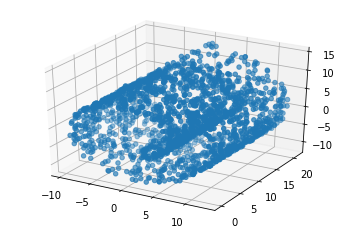

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plt.scatter(s_curve[:,0],s_curve[:,1],s_curve[:,2])
ax.scatter(swissroll[:,0],swissroll[:,1],swissroll[:,2])

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
10 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  20  nodes on  100  points and  10  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1|0|0|0|0|0|0|1|0|1||20	0.4216	20	19	1	1	0	0	0.3726	0.3709	0.5535	0.5556	0.0483	0.0007	0.0139	0.2785	0


MSDEnergyPlot not yet implemented
accuracyComplexityPlot not yet implemented
1.6657  seconds elapsed


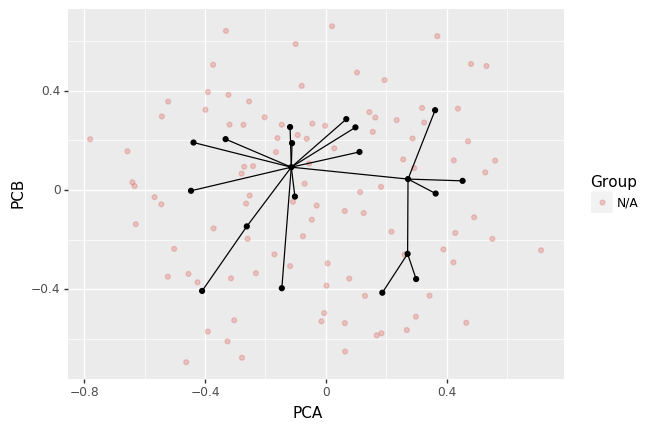

[<ggplot: (8753007857033)>]


In [6]:
import elpigraph
data= np.random.random((100,10))
pg = elpigraph.computeElasticPrincipalTree(data,20)

In [12]:
modified_pg = elpigraph.ExtendLeaves(data, pg[0],
                Mode = "WeightedCentroid",
                ControlPar = .9,
                DoSA = True,
                DoSA_maxiter = 2000,
                LeafIDs = None,
                TrimmingRadius = float('inf'),
                PlotSelected = False)

In [6]:
res = intdimr.pcaLocalDimEst(data,ver='FO')
r_pca = dict(zip(res.names,[np.array(i) for i in res]))

res = intdimr.dancoDimEst(data,k=10,D=10)
r_danco = dict(zip(res.names,[np.array(i) for i in res]))

res = intdimr.knnDimEst(data,k=10,ps=np.arange(11,50),M=5,gamma=2)
r_knn = dict(zip(res.names,[np.array(i) for i in res]))

res = intdimr.maxLikGlobalDimEst(data,k=20)
r_gmle = dict(zip(res.names,[np.array(i) for i in res]))

res = intdimr.maxLikLocalDimEst(data)
r_lmle = dict(zip(res.names,[np.array(i) for i in res]))

res = intdimr.maxLikPointwiseDimEst(data,k=20)
r_pmle = np.array([i[0] for i in res])

res = intdimr.pcaOtpmPointwiseDimEst(data,N=50)
r_pcaOtpm = [np.array([i[0] for i in res]), np.array([i[1] for i in res])]


r_corint = np.array(ider.corint(data,k1=10,k2=20))
r_mada = np.array(ider.mada(data,local=True,k=20))

R[write to console]: Computing DANCo calibration data for N = 500, k = 10 for dimensions 1 to 10



In [3]:
corint = global_id.CorrInt().fit(data)
danco = global_id.DANCo(D=10).fit(data)
knn = global_id.KNN().fit(data)
mada = global_id.Mada(local=True,k=20).fit(data)
twonn = global_id.TwoNN().fit(data)

ess = local_id.ESS().fit(data)
fishers = local_id.FisherS().fit(data)
lpca = local_id.lPCA().fit(data)

KeyboardInterrupt: 